<a href="https://colab.research.google.com/github/GrigoryBartosh/hse08_ip/blob/master/hw1_hse_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №1


Задание присылать на обе почты почты **aleksartamonov@gmail.com**  **dashkov.alexander.om@gmail.com** в виде ссылки на colab

В теме письма указать ***HSE2020 HW1 <Фамилия Имя>***

soft deadline: 02.02.2020T23:59:00+0300

hard deadline: 09.02.2020T23:59:00+0300

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?

Когда в глаз человека попадает достаточное количество света, он видит цветное изображение, воспринимая цвет колбочками. Когда же света мало, человек "видит" палочками, которые более светочувствительны, но не различают цвета. В светлом помещение палочки "засвечены" и при входе в темное помещение мозг перестраивается, переставая "смотреть" на сигналы от колбочек (так как они нулевые) и переключаясь на значение палочек.

##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1 и полностью плотно его заполняли?

Перепишем преобразование в матричном виде:

$$ c_{new} = A c + b $$

Тогда обратное преобразование будет выглядеть так:

$$ c = A^{-1}(c_{new} - b) $$

Для того, чтобы оно было возможным, матрица $A$ должна быть обратима, то есть определитель должен быть не $0$, то есть строки должны быть линейно независимы.

Чтобы после преобразования мы снова получили заполненный куб со сороной $1$, мы должны действовать на исходный куб поворотами вокруг центра на 90 градусов и отражениями. То есть матрица $A$ должна быть ортонормированной, а $b$ должен быть равен $0$.

## Практический блок

In [0]:
import itertools

import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

from google.colab.patches import cv2_imshow

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

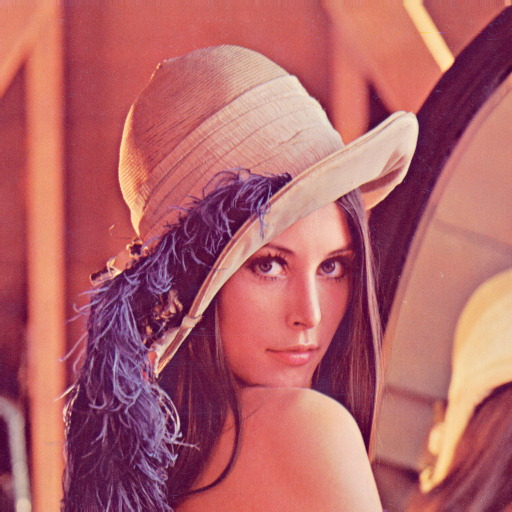

In [2]:
lena = cv2.imread('lena.jpg')

cv2_imshow(lena)

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

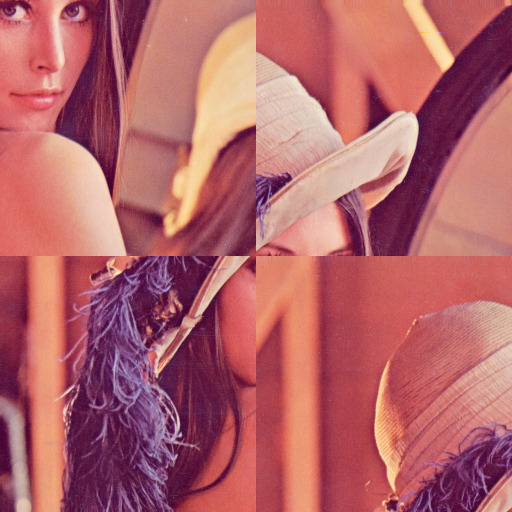

In [3]:
w, h = lena.shape[:2]
lena_swap = lena.copy()
lena_swap[0:w//2, 0:h//2], lena_swap[w//2:w, h//2:h] = lena[w//2:w, h//2:h].copy(), lena[0:w//2, 0:h//2].copy()

cv2_imshow(lena_swap)

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

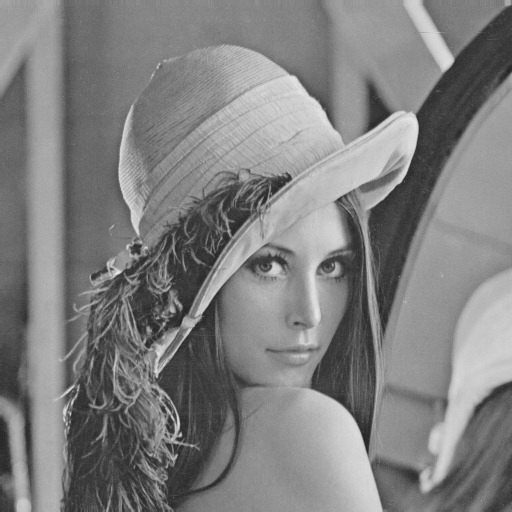

In [4]:
lena_gray_my = lena.mean(axis=2)

cv2_imshow(lena_gray_my)

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

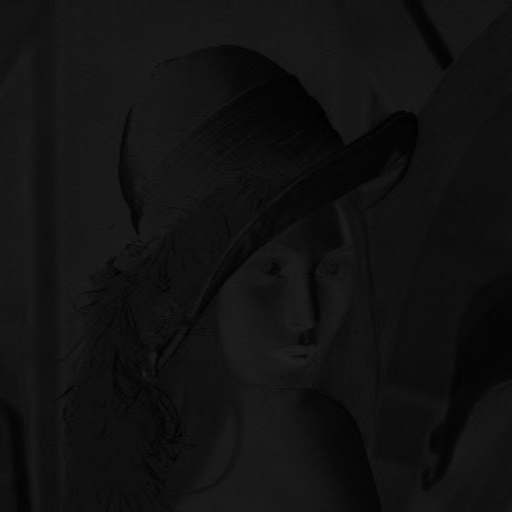

In [5]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)

diff = abs(lena_gray_cvt - lena_gray_my)

cv2_imshow(diff)

##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

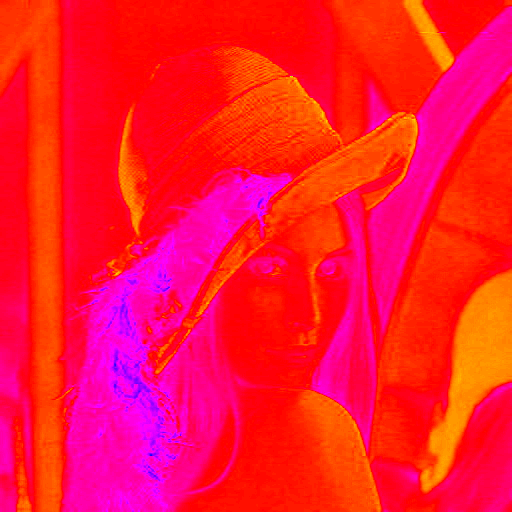

In [6]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
lena_hsv[:, :, 1:] = 255
lena_hsv_rgb = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB)

cv2_imshow(lena_hsv_rgb)

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

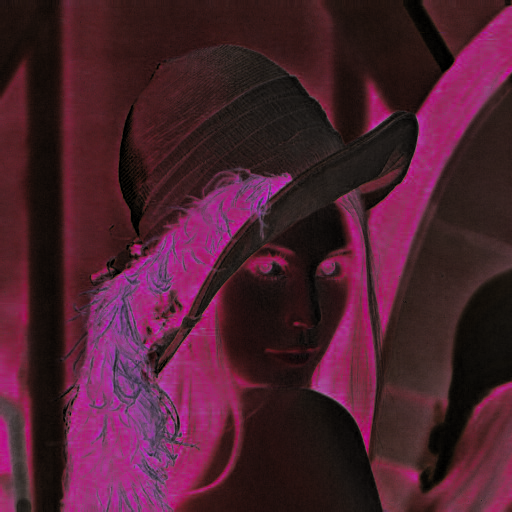

In [7]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
lena_hsv[:, :, 2] = 255 - lena_hsv[:, :, 2]
lena_hsv_rgb = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB)

cv2_imshow(lena_hsv_rgb)

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

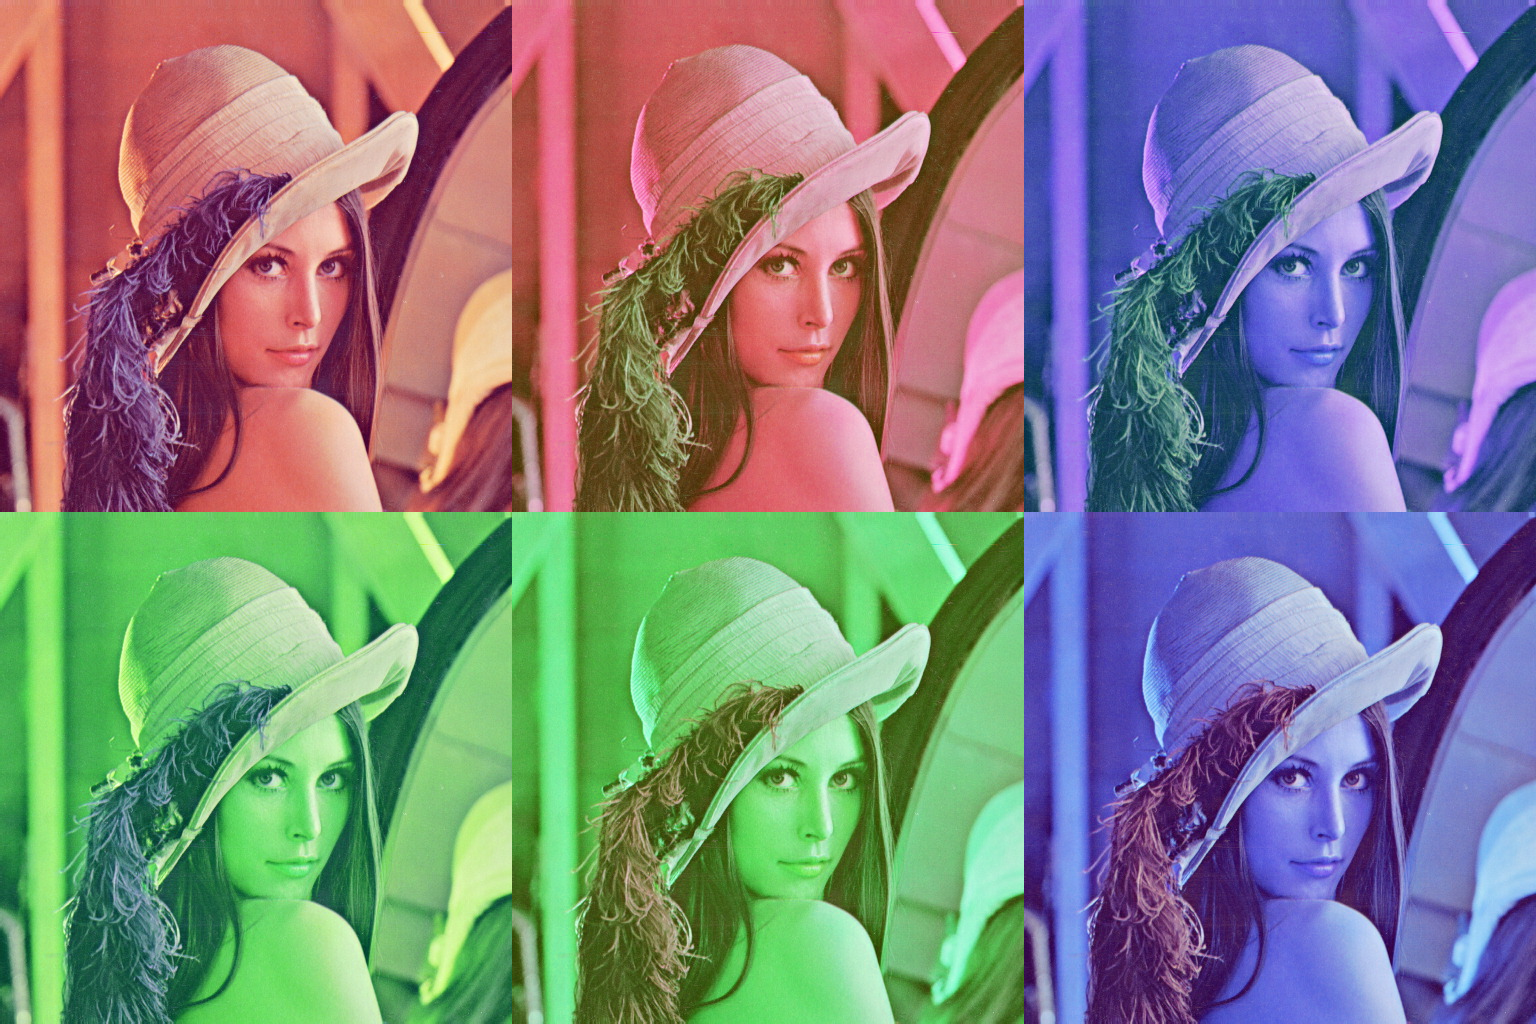

In [8]:
permuts = list(itertools.permutations(list(range(3))))
permuts = np.array(permuts).reshape(3, 2, 3)

lena_collage = []
for p_col in permuts:
    tmp_col = []
    for p in p_col:
        tmp = np.zeros(lena.shape)
        for i, c in enumerate(p):
            tmp[:, :, i] = lena[:, :, c].copy()
        tmp_col += [tmp]
    tmp_col = np.concatenate(tmp_col, axis=0)
    lena_collage += [tmp_col]
lena_collage = np.concatenate(lena_collage, axis=1)

cv2_imshow(lena_collage)

##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

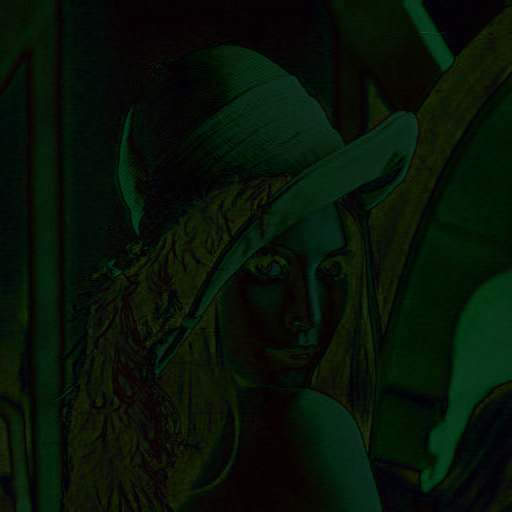

In [9]:
lena_lab_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2LAB)

def my_rgb_to_xyz(rgb):
    M = np.array([[0.4497288, 0.3162486, 0.1844926],
                  [0.2446525, 0.6720283, 0.0833192],
                  [0.0251848, 0.1411824, 0.9224628]])
    
    xyz = (M @ rgb.reshape(-1, 3).T).T
    return xyz

def my_xyz_to_lab(xyz):
    def f(t):
        eps = (6 / 29) ** 3
        k = (1 / 3) * (29 / 6) ** 2
        cond = t > eps
        c1 = t ** (1 / 3)
        c2 = (k * t + 16) / 116
        return cond.astype(int) * c1 + np.logical_not(cond).astype(int) * c2

    xn, yn, zn = my_rgb_to_xyz(np.array([255] * 3)).reshape(3)
    x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]

    l = 116 * f(y / yn) - 16
    a = 500 * (f(x / xn) - f(y / yn))
    b = 200 * (f(y / yn) - f(z / zn))

    l = l * 3 - 90
    a = -a + 170
    b = b + 110

    lab = np.stack((l, a, b), axis=1)
    return lab

def my_rgb_to_lab(rgb):
    xyz = my_rgb_to_xyz(rgb)
    lab = my_xyz_to_lab(xyz)
    return lab

w, h = lena.shape[:2]
lena_lab_my = lena.reshape(w * h, 3)
lena_lab_my = my_rgb_to_lab(lena_lab_my)
lena_lab_my = lena_lab_my.reshape(w, h, 3)

diff = abs(lena_lab_cvt - lena_lab_my)

cv2_imshow(diff)